In [1]:
from IPython.core.display import HTML
css = HTML("""
<style>
.jp-Cell.jp-MarkdownCell {
    max-width: 900px;
    margin-left: 100px;
    box-shadow: rgba(99, 99, 99, 0.2) 0px 2px 8px 0px;
    padding-bottom: 20px;
}
.jp-MarkdownOutput > :not(h1, h2, h3, table) {
  margin-left: 50px;
  margin-right: 50px;
}
</style>""")
display(css)

In [2]:
import sys
from typing import Iterable

import matplotlib.pyplot as plt
import pydantic
from typing import Union

class BaseModel(pydantic.BaseModel):
    class Config:
        extra="forbid"


def not_implemented(cls, *args, **kwargs):
    raise NotImplementedError

class RemoveMethods(type):
    def __new__(mcls, name, bases, attrs):
        cls = super().__new__(mcls, name, bases, attrs)
        builtins_to_deactivate = {"__add__","__radd__", "append", "extend", "insert", "pop", "reverse", "sort", "__contains__", "remove", "__delitem__", "__iter__", "__len__" }
        for method in builtins_to_deactivate  - attrs.keys():
            setattr(cls, method, not_implemented)
        return cls

In [3]:
sys.setrecursionlimit(15_000)

# Introduction

> Deux amis de longue date, Bric et Brac, ont ouvert deux magasins concurrente.
> 
> Bric dispose d'une grande étagère, qui permet de ranger chaque object dans un emplacement dédié.
>
> De son coté, Brac a ouvert son magasin au dessus d'un grand trou, qu'il compte utiliser pour stocker ses marchandises. Il a mis au point un système de boites, chaque boite étant reliée à la boite précédente par un crochet

<table> 
<tr>
    <th>Étagère de Bric</th>
    <th>Système de Brac</th>
</tr>

<tr>
    <td>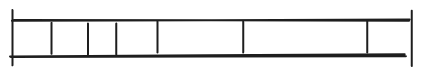</td>
    <td>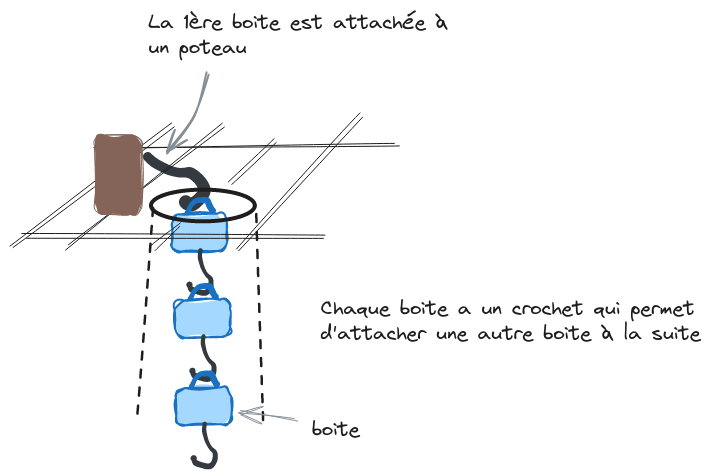</td>
</tr>

</table>


<!-- 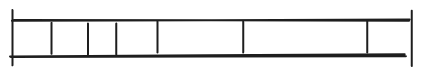 -->
<!-- 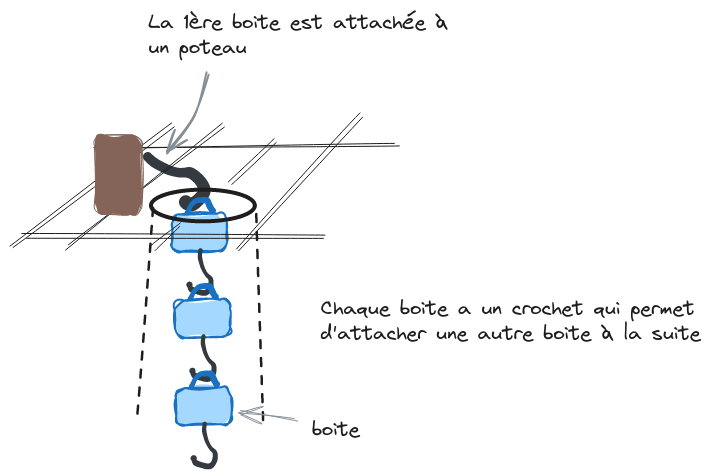 -->

Dans ce TD, nous allons étudier différentes stratégies de rangement de marchandises.

Pour ce faire, nous allons définir des structures de données très simples. Le but est de manipuler et d'étudier ces structures de données, afin de nous permettre faire d'obtenir les propriétés désirées en terme de:

- utilisation CPU (i.e. temps de calcul)
- utilisation mémoire (i.e. quantité de RAM utilisée)


Note: on utilisera des chaînes de caractère pour représenter les objets stockés.
# Magasin de Bric

## Étagère

<div style="float: right">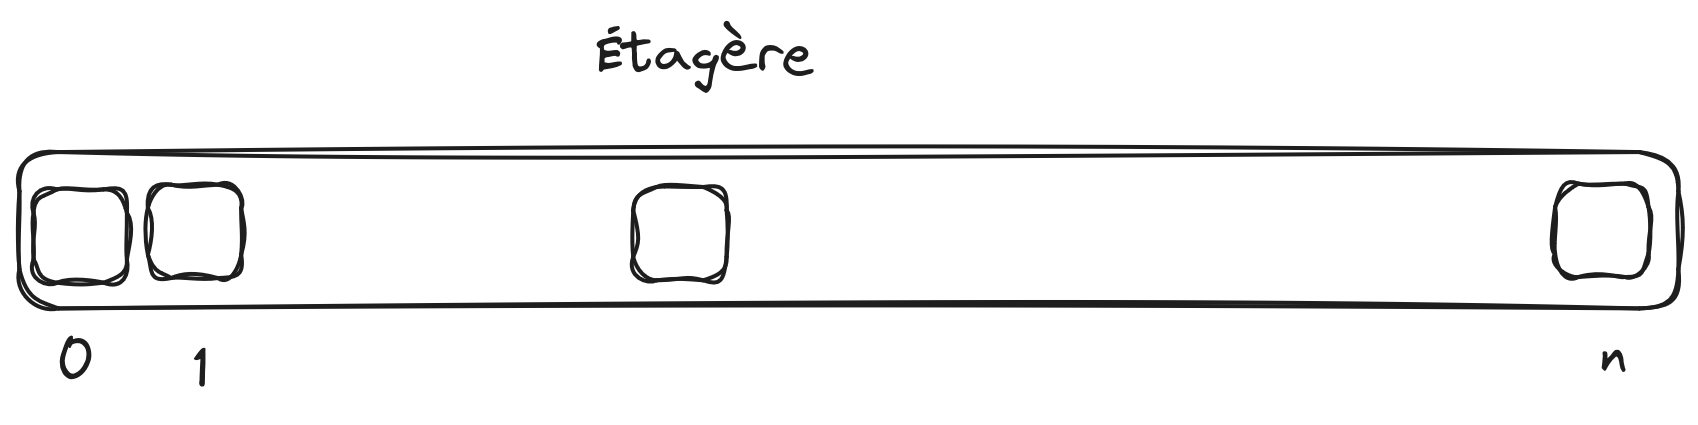</div>

<!-- 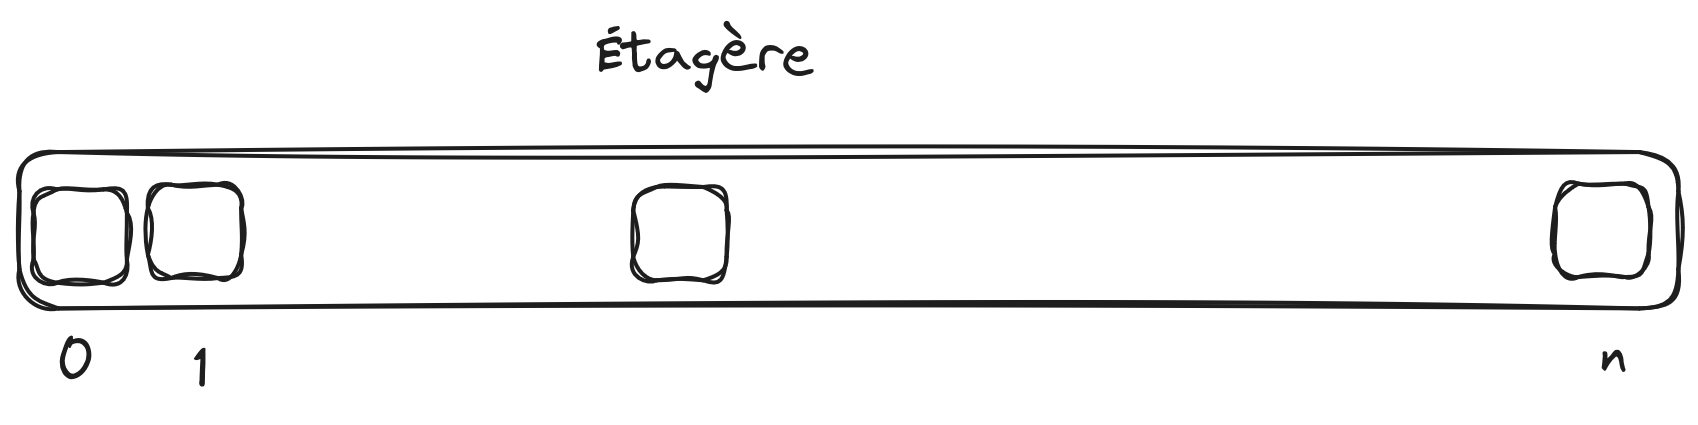 -->

Une étagère permet de ranger des éléments, et à accéder à chacun d'entre eux immédiatement.

Une fois qu'une étagère a été construite, on ne peut plus modifier sa taille.

**Note:** on utilisera la valeur `None` pour désigner un emplacement vide.

In [4]:
class Etagère(list[str], metaclass=RemoveMethods):
    """Classe pour une étagère. Il n'y a pas besoin de s'intéresser au code."""
    def __init__(self, capacité: int):
        super().__init__([None] * capacité)
        self.capacité = capacité
        
    def _repr_html_(self):
        """Sert à afficher l'objet dans un environnement jupyter"""
        def row(values):
            return "".join(f"<td>{value}</td>" for value in values)
        return f"""
        <style> table, th, td {{ border: 1px solid black !important; }} </style>
        <table>
            <tr><th>indice</th>{row(range(self.capacité))}</tr>
            <tr><th>valeur</th>{row(self[i] for i in range(self.capacité))}</tr>
        </table>
        """


### Exemples

Utilisation d'une étagère

In [5]:
# Instantiation: on crée une étagère avec 5 emplacements
a = Etagère(5)
a

indice,0,1,2,3,4
valeur,None,None,None,None,None


In [6]:
# accès à un élément
print(a[3])

None


In [7]:
# Modification d'un élément
a[3] = 2
a[3]

2

In [8]:
a

indice,0,1,2,3,4
valeur,None,None,None,2,None


## Magasin avec étagère

Bric emploie une méthode simple pour ranger ses livres: à chaque fois qu'il reçoit un nouveau livre, il le range au premier emplacement vide.

### Exercice

Enrichir la classe Étagère avec les méthodes suivantes, afin de permettre à Bric de l'utiliser comme librairie:

In [9]:
class Bric:
    def __init__(self, capacité=5):
        self.capacité = capacité
        self.eta = Etagère(capacité=capacité)

    def __getitem__(self, index):
        return self.eta[index]
    def __setitem__(self, index, value):
        self.eta[index] = value
    def _repr_html_(self):
        return self.eta._repr_html_()
    def nb_items(self) -> int:
        """Nombre d'éléments du tableau qui ne sont pas None"""
        #BEGIN
        res : int = 0
        for i in range(self.capacité):
            if self[i] is not None:
                res += 1
        return res
        #END

    def add(self, value: str):
        """
        Ajoute value dans la première case libre du tableau
        Lève une exception si plus de place
        """
        #BEGIN
        for i in range(self.capacité):
            if self[i] is None:
                self[i] = value
                return
        raise Exception("Plus de place")
        #END

    def remove(self, value):
        """
        Supprime la première case égale à value
        Lève une exception si pas trouvée
        """
        #BEGIN
        for i in range(self.capacité):
            if self.eta[i] == value:
                self.eta[i] = None
                return
        raise Exception("Pas trouvé")
        #END

    def contains(self, value) -> bool:
        """
        Teste si value fait partie des valeurs présentes
        """
        #BEGIN
        for i in range(self.capacité):
            if self.eta[i] == value:
                return True
        return False
        #END

    @staticmethod
    def from_values(
        capacité,
        values,
    ):
        res = Bric(capacité=capacité)
        for i, value in enumerate(values):
            res.add(value)
        return res

### Vérifications

Si les méthodes ci-dessus sont implémentées correctement, le cellules ci-dessous doivent s'exécuter sans erreur (et sans modifications)

**Note:** En cas de problème, ne pas hésiter à créer de nouvelles cellules de code pour débugger

In [10]:
lbric = Bric.from_values(capacité = 5, values=["aaa", "avx", "xyz"])

assert (
    lbric[0] == "aaa"
    and lbric[1] == "avx" 
    and lbric[2] == "xyz"
    and lbric[3] == None
)
assert lbric.nb_items() == 3
lbric

indice,0,1,2,3,4
valeur,aaa,avx,xyz,None,None


In [11]:
lbric = Bric.from_values(capacité = 5, values=["aaa", "avx", "xyz"])
print("On insère 'cde' dans la librairie")
lbric.add("cde")

assert lbric[3] == "cde"
assert lbric.nb_items() == 4

lbric

On insère 'cde' dans la librairie


indice,0,1,2,3,4
valeur,aaa,avx,xyz,cde,None


In [12]:
lbric = Bric.from_values(capacité = 5, values=["aaa", "avx", "xyz"])
print("On supprime avx de la librairie")
lbric.remove("avx")

assert lbric[1] is None
assert lbric.nb_items() == 2

lbric

On supprime avx de la librairie


indice,0,1,2,3,4
valeur,aaa,None,xyz,None,None


# Magasin de Brac

## Liste chaînée

Pour modéliser le magasin de Brac, nous allons utiliser une structure de données appelée *"Liste chaînée"*.

Une liste chaînée est constitée:
- soit de la liste vide
- soit d'un élément contenant une valeur, et rattaché à une autre liste

*Exemples*:
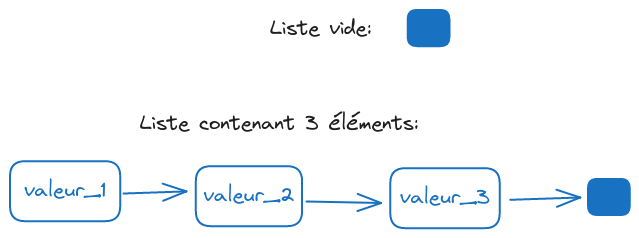

### Implémentation

On implémente ici une liste chaînée de la façon suivante:

On déclare une classe List contenant deux champs:
- `value`: contient la valeur de l'élément
- `next`: pointeur vers la liste suivante (qui peut être vide)

Si `value` est `None`, on considère que la liste est vide (dans ce cas, `next` doit aussi valoir `None`.


In [13]:
class List(BaseModel):
    """
    Implémentation d'une liste chaînée en python.
    
    Note: on considère que si value est None, alors la liste est vide
    (dans ce cas, next est sensé valoir None aussi).
    Si value n'est pas None, next ne doit pas valoir None.
    """
    value: str | None
    next: Union["List", None] = None

    def __init__(self, value=None, next=None):
        if value is None:
            if next is not None:
                raise ValueError("Cannot have empty list with next part")
            super().__init__(value=None, next=None)
    
        else:
            if next is None:
                next = EMPTY    
            super().__init__(value=value, next=next)

    def is_empty(self):
        return self.value is None

    def _repr_html_(self):
        """Affichage custom dans Jupyter"""
        if self.is_empty():
            return "■"
        return str(self.value) + " ⟶ " + self.next._repr_html_()

    def __eq__(self, other):
        """Test d'égalité"""
        if not isinstance(other, List):
            return False

        if self.is_empty() or other.is_empty():
            return self.is_empty() == other.is_empty()
        if self.value != other.value:
            return False
        return self.next == other.next

    def __radd__(self, value):
        """Permet d'utiliser l'opérateur + pour construire une liste"""
        if isinstance(value, List):
            raise NotImplementedError
        res = List(value, self)
        return res

class EmptyList(List):
    """Classe qui représente une liste vide. Les instances ne peuvent pas être modifiées."""
    def __init__(self):
        super().__init__(value=None, next=None)
    def __setattr__(self, key, value):
        if hasattr(self, "value"):
            raise Exception("Object is frozen")
        super().__setattr__(key, value)

EMPTY = EmptyList()

### Exemples d'utilisation

In [14]:
# Liste vide
List()

List(value=None, next=None)

In [15]:
List("a", EMPTY)

List(value='a', next=EmptyList(value=None, next=None))

In [16]:
List("dentifrice")

List(value='dentifrice', next=EmptyList(value=None, next=None))

In [17]:
List(
    "dentifrice", 
         List("Brosse à dent"))

List(value='dentifrice', next=List(value='Brosse à dent', next=EmptyList(value=None, next=None)))

Enfin nous définissons une classe EmptyList, qui servira à créer un object EMPTY qui ne pourra pas être modifié, dont nous verrons l'intérêt par la suite.  

In [18]:
# EMPTY est bien égal à une liste vide
EMPTY == List()

True

On ne peut pas modifier la liste vide:

In [19]:
try:
    EMPTY.value = "test"
except Exception as exc:
    display(exc)

Exception('Object is frozen')

### Exemples d'utilisation

On pourra utiliser l'objet EMPTY pour créer facilement des listes "à la main" (grace à la méthode `List.__radd__`).

In [20]:
(3 + EMPTY)

List(value='3', next=EmptyList(value=None, next=None))

In [21]:
2 + (3 + EMPTY)

List(value='2', next=List(value='3', next=EmptyList(value=None, next=None)))

In [22]:
2 + (3 + EMPTY) == 2 + (3 + EMPTY)

True

## Manipulation d'une liste chaînée

### Exemple: longueur d'une liste

Nous allons présenter deux méthodes pour calculer la longueur d'une liste


In [23]:
# Méthode avec boucle while

def longueur_while(liste: List):
    current_len = 0
    while not liste.is_empty():
        current_len += 1
        liste = liste.next
    return current_len

In [24]:
print(longueur_while( EMPTY))
print(longueur_while( "a" + EMPTY))
print(longueur_while( "c" + ("b" + ("a" + EMPTY))))

0
1
3


In [25]:
# Méthode avec fonction récursive

def longueur_recursive(liste: List):
    if liste.is_empty():
        return 0
    else:
        return 1 + longueur_recursive(liste.next)

In [26]:
print(longueur_recursive( EMPTY))
print(longueur_recursive( "a" + EMPTY))
print(longueur_recursive( "c" + ("b" + ("a" + EMPTY))))

0
1
3


### Exercices

Implémenter les fonctions suivantes.

**Note**: 

In [27]:
def get_head(liste: List) -> str | None:
    """Retourne la première valeur de la liste (ou None si la liste est vide)"""
    if liste.is_empty():
        return None
    return liste.value

In [28]:
def get_nth(liste: List, n: int) -> str | None:
    """Retourne la n-ème  valeur de la liste (ou None si la liste ne contient pas de n-ème élément)"""
    if liste.is_empty():
        return None
    if n == 0:
        return liste.value
    return get_nth(liste.next, n - 1)

In [29]:
def insert_front(value, liste) -> List:
    """Retourne une liste où value a été ajoutée à la fin"""
    return value + liste

In [30]:
def insert_back(liste: List, value: str) -> List:
    """Retourne une liste où value a été ajoutée à la fin"""
    if liste.is_empty():
        return List(value)
    else:
        return List(liste.value, next=insert_back(liste.next, value))

insert_back((1 + EMPTY), 3)

List(value='1', next=List(value='3', next=EmptyList(value=None, next=None)))

In [31]:
def contains(liste: List, value: str):
    """Teste si la liste contient value"""
    if liste.is_empty():
        return False
    if liste.value == value:
        return True
    return contains(liste.next, value)

In [32]:
def remove(liste: List, value: str) -> List:
    """Retourne une liste où value a été enlevée"""
    if liste.is_empty():
        raise Exception("Pas trouvé")
    if liste.value == value:
        return liste.next
    return List(liste.value, remove(liste.next, value))

### Vérifications

In [33]:
assert get_head(EMPTY) == None
assert get_head("a" + EMPTY) == "a"
assert get_head("b" + ("a" + EMPTY)) == "b"

## Exercices 

Enrichir la classe List avec les méthodes suivantes, afin de permettre à Brac de l'utiliser comme librairie:

In [34]:
class Brac:
    def __init__(self):
        self.list = List()
        
    def _repr_html_(self):
        return self.list._repr_html_()
    
    def nb_elements(self):
        return longueur_recursive(self.list)

    def add(self, value: str):
        self.list = value + self.list

    def remove(self, value):
        self.list = remove(self.list, value)
    
    def contains(self, value):
        return contains(self.list, value)
    
    @staticmethod
    def from_values(
        capacité,
        values
    ):
        res = Brac()
        for i, value in enumerate(values):
            res.add(value)
        return res

In [35]:
b = Brac()
b.add("a")
display(b)
b.add("b")
display(b)
b.add("c")
display(b)
b.nb_elements()

3

In [36]:
try:
    b.remove("d")
    b
except Exception as exc:
    display(exc)

Exception('Pas trouvé')

In [37]:
b.remove("a")
b

# Problème

Deux libraires concurrents veulent créer une base de données de leurs livres. Pour cela, l'un veut utiliser une liste, l'autre un tableau.

La base de données servira à connaître rapidement si un livre est disponible ou non. Régulièrement, des livres seront ajoutés, et les peuvent aussi être vendus.

Quelle base de données sera la plus rapide pour effectuer ces opérations ?

**Instruction:** Mesurer les temps pour
- ajouter un livre
- savoir si un livre est dans la librairie

pour des librairies de taille 1000, 2000, 5000 et 10000

In [38]:
import time
import random
import string

def random_title(length: int):
    return "".join(random.choice(string.ascii_letters) for _ in range(length))


all_books = [random_title(10) for _ in range(10_000)]
to_insert = [random_title(10) for _ in range(100)]
to_search = [random_title(10) for _ in range(100)]

def make_list(size: int):
    return List.from_values(initial_data[0:size])

def make_array(size: int):
    return Array.from_values(initial_data[0:size])

In [39]:
def benchmark_add(Klass, nb_items: int):
    magasin = Klass.from_values(nb_items * 2, all_books[0:nb_items])
    
    start_time = time.perf_counter()
    for value in to_insert:
        magasin.add(value)
    end_time = time.perf_counter()

    print(f"({nb_items}, {end_time - start_time}), # insertion {Klass.__name__}")

def benchmark_contains(Klass, nb_items: int):
    magasin = Klass.from_values(nb_items, all_books[0:nb_items])

    start_time = time.perf_counter()
    for value in to_search:
        magasin.contains(value)
    end_time = time.perf_counter()

    print(f"({nb_items}, {end_time - start_time}), # recherche {Klass.__name__}")
        
        

In [40]:
benchmark_add(Bric, 1000)
benchmark_add(Bric, 2000)
benchmark_add(Bric, 5000)
benchmark_add(Bric, 10000)

(1000, 0.0062870570000086445), # insertion Bric
(2000, 0.012655767999603995), # insertion Bric
(5000, 0.05310357199959981), # insertion Bric
(10000, 0.10006907400020282), # insertion Bric


In [41]:
benchmark_add(Brac, 1000)
benchmark_add(Brac, 2000)
benchmark_add(Brac, 5000)
benchmark_add(Brac, 10000)

(1000, 0.0005900159994780552), # insertion Brac
(2000, 0.0004190540003037313), # insertion Brac
(5000, 0.0003971879996242933), # insertion Brac
(10000, 0.00041145299928757595), # insertion Brac


In [42]:
def affiche_valeurs(titre: str = None, **kwargs: list[tuple[int, int]]):
    """Affiche les valeurs passées en argument"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    for name, values in kwargs.items():
        xs = [value[0] for value in values]
        ys = [value[1] for value in values]
        ax.plot(xs, ys, "o-", label=name)
    fig.legend()
    ax.grid()
    ax.set_xlabel("Taille de l'entrée")
    ax.set_ylabel("Temps d'exécution (s)")
    if titre is not None:
        ax.set_title(titre)

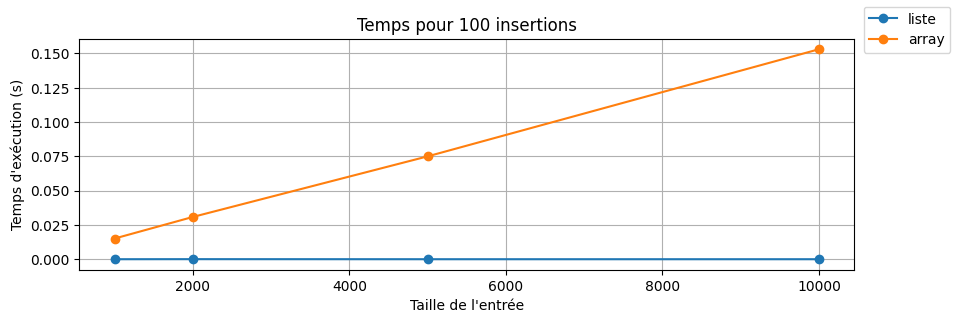

In [43]:

affiche_valeurs(
    titre="Temps pour 100 insertions",
    liste=(
(1000, 3.711800673045218e-05), # insertion List
(2000, 8.625599730294198e-05), # insertion List
(5000, 3.944999480154365e-05), # insertion List
(10000, 3.821800055447966e-05), # insertion List
    ),
    array=(
(1000, 0.015094153000973165), # insertion Array
(2000, 0.030815688995062374), # insertion Array
(5000, 0.07496714200533461), # insertion Array
(10000, 0.15300821499840822), # insertion Array
    )
)

In [44]:
benchmark_contains(Bric, 1000)
benchmark_contains(Bric, 2000)
benchmark_contains(Bric, 5000)
benchmark_contains(Bric, 10000)

(1000, 0.0042248529998687445), # recherche Bric
(2000, 0.00956095999936224), # recherche Bric
(5000, 0.02277204200072447), # recherche Bric
(10000, 0.05151859500074352), # recherche Bric


In [45]:
benchmark_contains(Brac, 1000)
benchmark_contains(Brac, 2000)
benchmark_contains(Brac, 5000)
benchmark_contains(Brac, 10000)

(1000, 0.016503208000358427), # recherche Brac
(2000, 0.025626136999562732), # recherche Brac
(5000, 0.06414894599947729), # recherche Brac
(10000, 0.13702863399976195), # recherche Brac


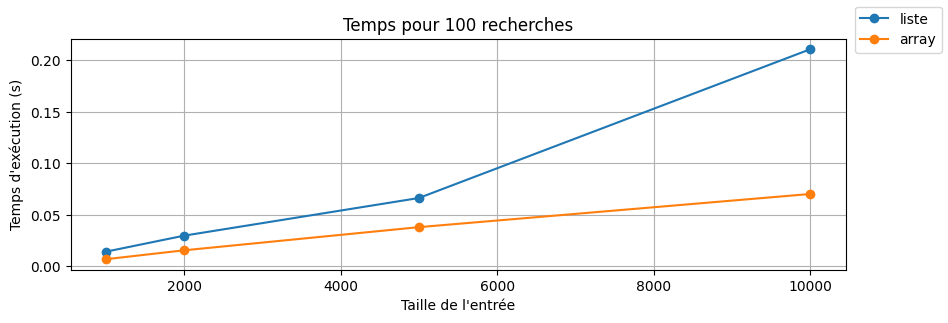

In [46]:
affiche_valeurs(
    titre="Temps pour 100 recherches",
    liste=(
(1000, 0.014344584007631056), # recherche List
(2000, 0.02990555299038533), # recherche List
(5000, 0.06645613399450667), # recherche List
(10000, 0.21083943199482746), # recherche List
    ),
    array=(
(1000, 0.007048465005937032), # recherche Array
(2000, 0.01569576800102368), # recherche Array
(5000, 0.03817352600162849), # recherche Array
(10000, 0.07036486100696493), # recherche Array  
    )
)